<a href="https://colab.research.google.com/github/rahulrajpr/AdvancedFeatureEngineering/blob/Scalling/Normalisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [34]:
from sklearn.datasets import load_boston

In [35]:
boston = load_boston()

In [36]:
data = pd.DataFrame(data = boston.data, columns = boston.feature_names)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [38]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [39]:
target = pd.Series(boston.target).rename('MEDV')

In [40]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [41]:
data.describe().loc['mean']

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
Name: mean, dtype: float64

In [42]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train,X_test, y_train, y_test = train_test_split(data,target, train_size = 0.7, random_state = 100)

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
scaler = MinMaxScaler()

In [47]:
scaler.fit(X_train)

MinMaxScaler()

In [48]:
scaler.data_max_.round(2)

array([ 73.53, 100.  ,  27.74,   1.  ,   0.87,   8.78, 100.  ,  10.71,
        24.  , 711.  ,  22.  , 396.9 ,  37.97])

In [49]:
scaler.min_.round(2)

array([-0.  ,  0.  , -0.05,  0.  , -0.79, -0.68, -0.06, -0.12, -0.04,
       -0.36, -1.34, -0.  , -0.05])

In [50]:
scaler.transform(X_train)

array([[7.90834430e-02, 0.00000000e+00, 6.36637769e-01, ...,
        8.08510638e-01, 9.92233597e-01, 2.36203091e-01],
       [1.20770680e-03, 0.00000000e+00, 4.37994723e-01, ...,
        6.48936170e-01, 9.65530284e-01, 1.98951435e-01],
       [1.39085935e-01, 0.00000000e+00, 6.36637769e-01, ...,
        8.08510638e-01, 9.56629179e-01, 4.49779249e-01],
       ...,
       [3.77544378e-03, 0.00000000e+00, 2.32566905e-01, ...,
        7.44680851e-01, 9.85450603e-01, 2.76214128e-01],
       [4.00664892e-04, 2.00000000e-01, 7.99095364e-02, ...,
        2.44680851e-01, 9.75818246e-01, 5.60154525e-02],
       [2.78697385e-03, 1.25000000e-01, 2.51036562e-01, ...,
        2.76595745e-01, 9.74103586e-01, 7.78145695e-01]])

In [51]:
X_train_scaled = pd.DataFrame(data = scaler.transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(data = scaler.transform(X_test), columns = X_test.columns)

In [52]:
X_train_scaled.describe().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00
mean,0.05,0.12,0.37,0.07,0.34,0.52,0.66,0.28,0.37,0.42,0.62,0.90,0.30
std,0.11,0.23,0.26,0.26,0.24,0.14,0.30,0.21,0.38,0.32,0.23,0.23,0.20
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.15,0.00,0.13,0.45,0.42,0.10,0.13,0.17,0.51,0.95,0.14
50%,0.00,0.00,0.30,0.00,0.29,0.51,0.75,0.22,0.17,0.27,0.68,0.99,0.24
75%,0.05,0.20,0.64,0.00,0.49,0.59,0.93,0.43,1.00,0.91,0.81,1.00,0.41
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [53]:
X_train_scaled.describe().loc[['mean','std','min','max']].round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
mean,0.05,0.12,0.37,0.07,0.34,0.52,0.66,0.28,0.37,0.42,0.62,0.90,0.3
std,0.11,0.23,0.26,0.26,0.24,0.14,0.30,0.21,0.38,0.32,0.23,0.23,0.2
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0


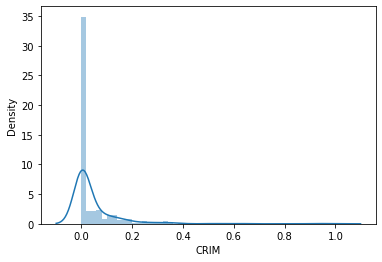

In [54]:
sns.distplot(X_train_scaled['CRIM'])
plt.show()

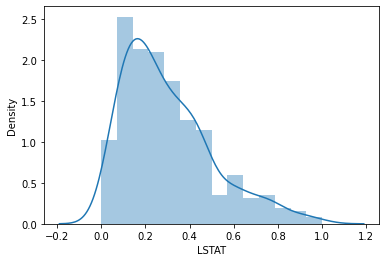

In [55]:
sns.distplot(X_train_scaled['LSTAT'])
plt.show()